# NBA Trends Project

Throughout this project, we'll embark on an exploration of NBA (National Basketball Association) data, diving into its intricate details to unveil potential associations and insights. Our dataset originates from 538's comprehensive analysis titled the Complete History Of The NBA, drawing from the original, unaltered data provided by Basketball Reference. Additionally, this dataset includes supplementary variables introduced by 538 to enrich the analytical possibilities.

In [67]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [69]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [70]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### Task 1

Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [71]:
knicks_pts = nba_2010[nba_2010.fran_id == 'Knicks']['pts']
nets_pts = nba_2010[nba_2010.fran_id == 'Nets']['pts']

### Task 2

Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. 


In [72]:
diff_means_2010 = knicks_pts.mean() - nets_pts.mean()
print(diff_means_2010)

9.731707317073173


### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets.


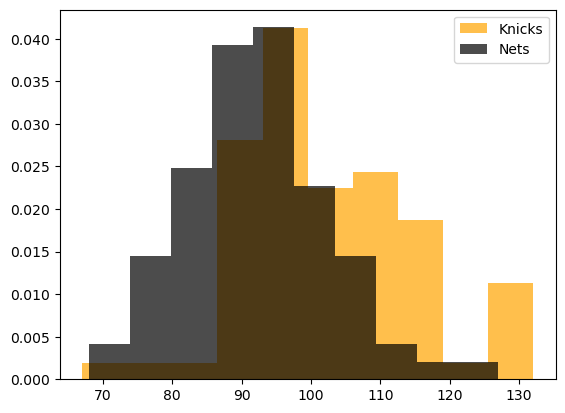

In [73]:
plt.hist(knicks_pts, color='orange', label='Knicks', density=True, alpha=0.7)
plt.hist(nets_pts, color='black', label='Nets', density=True, alpha=0.7)
plt.legend()
plt.show()

### Task 4
Now, let’s compare the 2010 games to 2014. 

0.44706798131809933


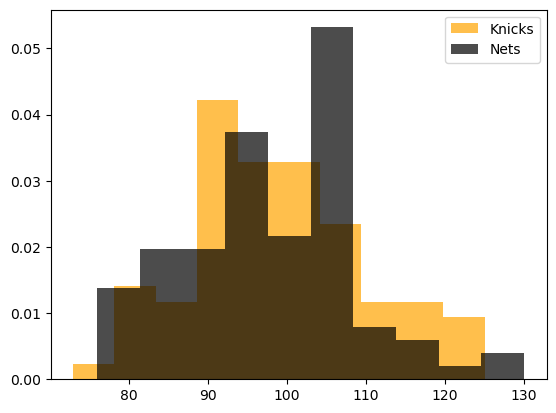

In [74]:
knicks_pts = nba_2014[nba_2014.fran_id == 'Knicks']['pts']
nets_pts = nba_2014[nba_2014.fran_id == 'Nets']['pts']
diff_means_2014 = knicks_pts.mean() - nets_pts.mean()
print(diff_means_2014)

plt.hist(knicks_pts, color='orange', label='Knicks', density=True, alpha=0.7)
plt.hist(nets_pts, color='black', label='Nets', density=True, alpha=0.7)
plt.legend()
plt.show()

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

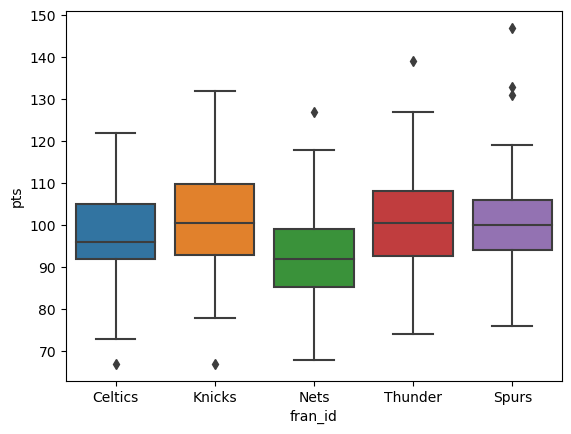

In [86]:
sns.boxplot(data = nba_2010, x= 'fran_id', y = 'pts')
plt.show()

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). We can see that there are more away loses in this dataset then home loses. Additionally, there are more home wins then away wins. This indicates that a team might be more likely to win at home then an away game. It is important to note that since not all NBA teams are included in this data set, then some discrepencies exist.

In [87]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


### Task 7

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`.

In [88]:
location_result_proportions = location_result_freq/len(nba_2010) * 100
print(location_result_proportions)

game_location          A          H
game_result                        
L              29.555556  23.333333
W              20.444444  26.666667


### Task 8
Using the contingency table created above (Task 6), calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?


In [93]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We have a score of 6.50 which indicated an assoctiation.

### Task 9

Using `nba_2010`, calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. 


In [96]:
covariance_nba = np.cov(nba_2010.point_diff, nba_2010.forecast)
print(covariance_nba)

[[186.56   1.37]
 [  1.37   0.05]]


Our covariance of 1.37 seems to indicate that there is a tendency for both variables to increase or decrease together.

### Task 10

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?


In [99]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

PearsonRResult(statistic=0.4402088708468081, pvalue=9.41039157313972e-23)


The pearson score indicates a moderate positive linear relationship between the two variables. This means that as one variable increases the other one increases as well, but not too strongly.

### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). 

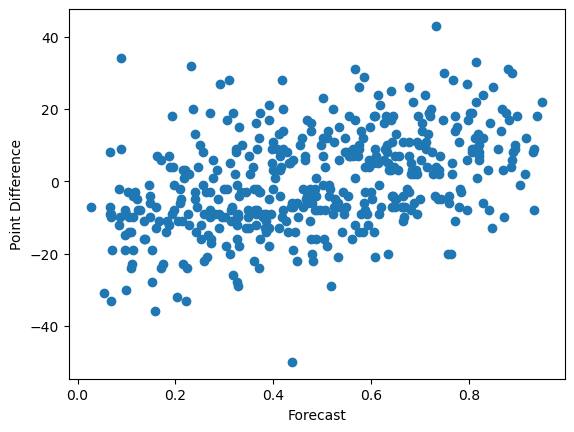

In [103]:
plt.scatter(x= nba_2010.forecast, y= nba_2010.point_diff)
plt.xlabel("Forecast")
plt.ylabel("Point Difference")
plt.show()

The scatter plot allows you to visualize the weak positive correlation between the two columns. 